In [1]:
# Import necessary libraries for text data preprocessing
import os
import re
import nltk
import spacy
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk.corpus import stopwords

In [2]:
nlp = spacy.load('en_core_web_sm')

In [4]:
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

extra_words = ['not','until','against','up', 'down', 'no', 'nor',"aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',
                                                "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 
                                                 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", "don't"]

stop_words = [word for word in stopwords if word not in extra_words]

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


TypeError: 'WordListCorpusReader' object is not iterable

In [5]:
print(stop_words)

{'just', "you'll", 'hadn', 'was', "she'll", 'are', 'its', 'and', 'if', 'didn', "we've", 'couldn', 'ours', 'your', 's', 'why', 't', "he'd", "couldn't", 'few', "i'm", 'when', "mightn't", 'haven', "they'd", "we're", 'theirs', "aren't", "they've", "should've", 'themselves', 'on', 'shan', 'we', 'after', "they'll", 'himself', 'off', 'so', 'further', "won't", "don't", 'they', "isn't", 'doing', 'there', 'i', 'mustn', 'about', 'for', 'ain', 'our', 'now', 'you', "i'd", 'has', 'with', "they're", 'once', 'm', "she's", "he'll", 'too', "you'd", 'this', "weren't", 'which', "i'll", 'through', 'itself', 'below', 'them', 'before', 'where', 'he', 'while', "it'll", 'same', 'until', "you've", "shan't", 'shouldn', 'not', "haven't", 'it', 'his', 'their', 'yourself', 'been', 'doesn', 'that', 'does', 'both', "i've", 'him', "doesn't", 'above', 'nor', 'each', 'whom', 'she', 'myself', 're', 'from', 'weren', 'won', "didn't", 'hasn', 'have', "she'd", 'very', 'wouldn', 'hers', 'at', 'isn', 'yours', "we'd", 'than', '

**Loading the dataset**

In [6]:
df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding="latin", header=None, on_bad_lines='skip')

# renaming columns
df.rename(columns={0:'labels', 5:'tweets'}, inplace=True)

# Dropping unnecessary columns 
df.drop([1,2,3,4], axis=1, inplace=True)

df['labels'] = df['labels'].replace(4,1)

# Randomly shuffling the DataFrame and selecting a subset of 10,000 rows
df = df.sample(frac=1)
df = df.head(10000)

df.head()

,labels,tweets
1258692,1,Up up and away! Pew pew pew!
481027,0,"good news, now working at 12 instead of 10, th..."
1286777,1,@TylerDurden678 this is true
403476,0,"Oops, sorry about that - playing with a scanne..."
327585,0,So I love how I am required to read The Republ...


In [7]:
def get_word_len(tweet):
    return len(tweet.split(' '))

def get_char_len(tweet):
    return len(tweet)

def preprocess_tweet(tweet):
    tweet = tweet.lower()
    # remove urls from the tweet
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove mentions (e.g., @username) from the tweet
    tweet = re.sub(r'@\w+', '', tweet)
    
    # Remove special characters and punctuation from the tweet
    tweet = re.sub(r'[^\w\s#]', '', tweet)
    
    # Lemmatize the words using spaCy
    tokens = [token.lemma_ for token in nlp(tweet)]
    
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    
    # Remove single-character tokens
    tokens = [token for token in tokens if len(token) > 1]
    
    # Join the processed tokens to form the cleaned tweet
    processed_tweet = ' '.join(tokens)
    
    return processed_tweet

df['clean_tweets'] = [preprocess_tweet(tw) for tw in tqdm(df['tweets'], position=0, leave=True)]

df['tweets_words_length'] = df['clean_tweets'].apply(get_word_len)

df['tweets_char_length'] = df['clean_tweets'].apply(get_char_len)

df.head()

100%|██████████| 10000/10000 [01:28<00:00, 113.45it/s]


,labels,tweets,clean_tweets,tweets_words_length,tweets_char_length
1258692,1,Up up and away! Pew pew pew!,away pew pew pew,7,19
481027,0,"good news, now working at 12 instead of 10, th...",good news work 12 instead 10 bad news sure go ...,12,56
1286777,1,@TylerDurden678 this is true,true,1,4
403476,0,"Oops, sorry about that - playing with a scanne...",oops sorry play scanner cursor wrong window,7,43
327585,0,So I love how I am required to read The Republ...,love require read republic plato book go away,8,45


In [8]:
df.shape

(10000, 5)

In [9]:
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [10]:
# number of positive sentiment tweets
positive_count = len(df[df['labels']==1])
negative_count = len(df[df['labels']==0])
# print(f"Negative sentiment tweets = {len(df[df['labels']==0])}")
# print(f"Positive sentiment tweets = {len(df[df['labels']==1])}")

fig = px.pie(values = [positive_count,negative_count], title = "Distribution of positive and negative tweets", 
        names = ['Positive', 'Negative'], hover_name = ['Positive', 'Negative'], opacity=.9, template='simple_white')

fig.show()

In [11]:
from wordcloud import WordCloud

Text(0.5, 1.0, 'Positive')

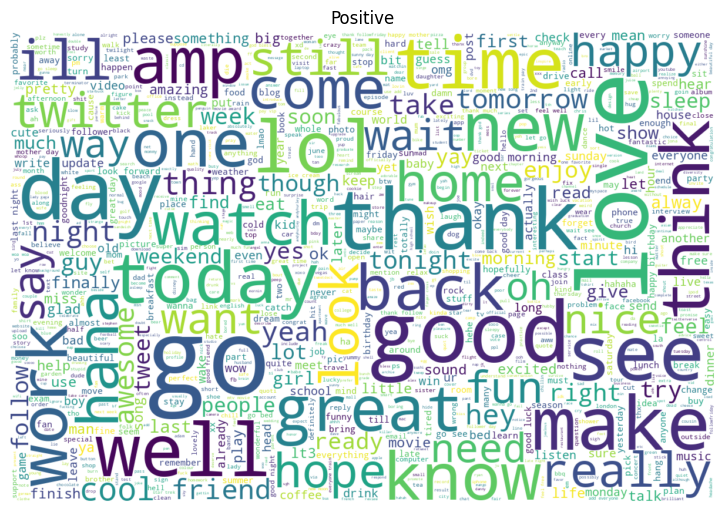

In [12]:
# for positive sentiment tweets

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)

wordcloud_1 = WordCloud(width=1200, height=800, max_words=1000, contour_width=2, background_color='white', max_font_size=180, 
                        colormap='viridis').generate(' '.join(df[df['labels']==1]['clean_tweets'])) 

plt.imshow(wordcloud_1, interpolation = 'bilinear')
plt.axis('off')
plt.title("Positive")

Text(0.5, 1.0, 'Negative')

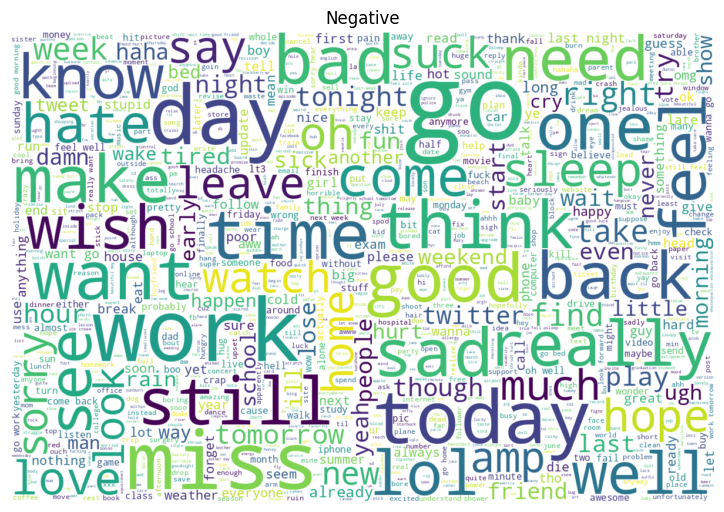

In [13]:
# for negative sentiment tweets 
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)

wordcloud_1 = WordCloud(width=1200, height=800, max_words=1000, contour_width=2, background_color='white', max_font_size=180, 
                        colormap='viridis').generate(' '.join(df[df['labels']==0]['clean_tweets'])) 

plt.imshow(wordcloud_1, interpolation = 'bilinear')
plt.axis('off')
plt.title("Negative")

In [14]:
# Create distribution plots for word count and character count for positive and negative tweets
fig_words = ff.create_distplot(
    [df[df['labels'] == 1]['tweets_words_length'], df[df['labels'] == 0]['tweets_words_length']],
    ['Positive', 'Negative'],
    bin_size=25,
    show_hist=False,
    show_rug=False
)

fig_chars = ff.create_distplot(
    [df[df['labels'] == 1]['tweets_char_length'], df[df['labels'] == 0]['tweets_char_length']],
    ['Positive', 'Negative'],
    bin_size=25,
    show_hist=False,
    show_rug=False
)

# Set titles and labels for the distribution plots
fig_chars.update_layout(title="Distribution Plot on Character Count", xaxis_title="Number of Characters", yaxis_title="Frequency")
fig_words.update_layout(title="Distribution Plot on Word Count", xaxis_title="Number of Words", yaxis_title="Frequency")

# Combine the plots in a 2-column layout
fig = make_subplots(rows=1, cols=2, subplot_titles=["Word Count", "Character Count"])
fig.add_trace(fig_words['data'][0], row=1, col=1)
fig.add_trace(fig_words['data'][1], row=1, col=1)
fig.add_trace(fig_chars['data'][0], row=1, col=2)
fig.add_trace(fig_chars['data'][1], row=1, col=2)

# Update overall layout and show the plot
fig.update_layout(title_text="Distribution Plots - Word Count vs Character Count", showlegend=True, font=dict(family="Arial", size=15, color="black"))
fig.show()

## Splitting the dataset

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(df['clean_tweets'], df['labels'], test_size=.2, random_state=42)

# further split the set into validation and testing set 
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=.5)

# Creating a pie chart to visualize the distribution of tweet counts in training, testing, and validation sets
fig = px.pie(values=[len(x_train), len(x_test), len(x_val)], title='Distribution of Training, Testing, and Validation Tweets', 
             names=['Training', 'Testing', 'Validation'], hover_name=['Training', 'Testing', 'Validation'], opacity=0.9, template='simple_white')

# Displaying the pie chart
fig.show()

## Building first NEURAL NETWORK

In [17]:
df.head()

,labels,tweets,clean_tweets,tweets_words_length,tweets_char_length
1258692,1,Up up and away! Pew pew pew!,away pew pew pew,7,19
481027,0,"good news, now working at 12 instead of 10, th...",good news work 12 instead 10 bad news sure go ...,12,56
1286777,1,@TylerDurden678 this is true,true,1,4
403476,0,"Oops, sorry about that - playing with a scanne...",oops sorry play scanner cursor wrong window,7,43
327585,0,So I love how I am required to read The Republ...,love require read republic plato book go away,8,45


In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [21]:
# Sequential is used to build the model step-by-step by adding layers one after another.​
from tensorflow.keras.models import Sequential

# Dense layers introduce trainable weights between nodes.
# Dropout layers prevent overfitting by randomly disabling some nodes during training
from tensorflow.keras.layers import Dropout, Dense


2025-10-12 13:59:59.827199: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760277600.070474      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760277600.156022      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Neural Network | One hot encoding

In [19]:
# converting clean_tweets to ONE HOT ENCODING
vec = CountVectorizer(binary=True)
vec.fit(df['clean_tweets'])

enc_tweets = vec.fit_transform(df['clean_tweets']).toarray()

x_train, x_test, y_train, y_test = train_test_split(enc_tweets, df['labels'], test_size=.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=.5)

In [20]:
print(f'Validation set details :-\n No. of rows:{x_val.shape[0]} \n No. of columns:{x_val.shape[1]}')

Validation set details :-
 No. of rows:1000 
 No. of columns:12789


In [27]:
model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(enc_tweets.shape[1],)))
model.add(Dropout(.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_1 = model.fit(x_train, y_train, epochs=2, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.5716 - loss: 0.6679 - val_accuracy: 0.7050 - val_loss: 0.5737
Epoch 2/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.8061 - loss: 0.4517 - val_accuracy: 0.7120 - val_loss: 0.5898


In [30]:
evaluations = model.evaluate(x_test, y_test)
print(f'loss = {evaluations[0]}')
print(f'accuracy = {evaluations[1]}')

# before using dropout, evaluation values
# [0.6890667080879211, 0.7080000042915344]

# after using dropout - 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7258 - loss: 0.5619
loss = 0.598643958568573
accuracy = 0.6990000009536743


### Neural Network | Count Vectorizer

In [40]:
# converting clean_tweets to Count Vectorizer
vec = CountVectorizer(binary=False)
vec.fit(df['clean_tweets'])

enc_tweets = vec.fit_transform(df['clean_tweets']).toarray()

x_train, x_test, y_train, y_test = train_test_split(enc_tweets, df['labels'], test_size=.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=.5)


model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(enc_tweets.shape[1],)))
model.add(Dropout(.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_2 = model.fit(x_train, y_train, epochs=2, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - accuracy: 0.5692 - loss: 0.6692 - val_accuracy: 0.6980 - val_loss: 0.5810
Epoch 2/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - accuracy: 0.8043 - loss: 0.4580 - val_accuracy: 0.6960 - val_loss: 0.5983


In [32]:
evaluations = model.evaluate(x_test, y_test)
print(f'loss = {evaluations[0]}')
print(f'accuracy = {evaluations[1]}')

# before using dropout, evaluation values
# [0.6890667080879211, 0.7080000042915344]

# after using dropout - 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7022 - loss: 0.5913
loss = 0.6002020835876465
accuracy = 0.7059999704360962


### Neural Network | TF-IDF

In [35]:
# converting clean_tweets to Count Vectorizer
tfidf = TfidfVectorizer()

enc_tweets = tfidf.fit_transform(df['clean_tweets']).toarray()

x_train, x_test, y_train, y_test = train_test_split(enc_tweets, df['labels'], test_size=.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=.5)


model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(enc_tweets.shape[1],)))
model.add(Dropout(.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_3 = model.fit(x_train, y_train, epochs=2, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - accuracy: 0.5613 - loss: 0.6732 - val_accuracy: 0.7160 - val_loss: 0.5511
Epoch 2/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - accuracy: 0.8192 - loss: 0.4342 - val_accuracy: 0.7160 - val_loss: 0.5623


In [34]:
evaluations = model.evaluate(x_test, y_test)
print(f'loss = {evaluations[0]}')
print(f'accuracy = {evaluations[1]}')


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7265 - loss: 0.5564
loss = 0.5951897501945496
accuracy = 0.7059999704360962


In [45]:
one_hot_encoding = history_1.history
count_vectorization = history_2.history
tf_idf = history_3.history
print(f"ONE HOT Encoding: \n Accuracy:{one_hot_encoding['accuracy'][1]} Loss:{one_hot_encoding['loss']}\n")
print(f"Count Vectorization: \n Accuracy:{count_vectorization['accuracy'][1]} Loss:{count_vectorization['loss']}\n")
print(f"TF IDF: \n Accuracy:{tf_idf['accuracy'][1]} Loss:{tf_idf['loss']}\n")
# history_2.history


ONE HOT Encoding: 
 Accuracy:0.8017500042915344 Loss:[0.6317499876022339, 0.4591946601867676]

Count Vectorization: 
 Accuracy:0.7985000014305115 Loss:[0.6367350220680237, 0.4624641239643097]

TF IDF: 
 Accuracy:0.8111249804496765 Loss:[0.6399238109588623, 0.43749794363975525]



In [44]:
history_2.history

{'accuracy': [0.6256250143051147, 0.7985000014305115],
 'loss': [0.6367350220680237, 0.4624641239643097],
 'val_accuracy': [0.6980000138282776, 0.6959999799728394],
 'val_loss': [0.5809789896011353, 0.5982611179351807]}